# Table of Contents

## 1. Age Group Ordering Habits
## 2. Age Stats
## 3. Sales Per Region
## 4. Sales Per Department

# Importing Libraries and Data

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy

# import df

path = r'C:\Users\Charles Yi\04-2023 Instacart Basket Analysis\02 Data\Prepared Data'

df = pd.read_pickle(os.path.join(path, 'dep_cust_profile.pkl'))

In [2]:
df.head()

,user_id,region,Age,income,n_dependants,department_id,product_name,prices,add_to_cart_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,age_group,income_group,family_group,department
0,1,South,31,40423,3,7,Soda,9.0,1,2,8,NaN,18-44,Low income,Family,beverages
1,1,South,31,40423,3,7,Soda,9.0,1,3,7,15.0,18-44,Low income,Family,beverages
2,1,South,31,40423,3,7,Soda,9.0,1,3,12,21.0,18-44,Low income,Family,beverages
3,1,South,31,40423,3,7,Soda,9.0,1,4,7,29.0,18-44,Low income,Family,beverages
4,1,South,31,40423,3,7,Soda,9.0,1,4,15,28.0,18-44,Low income,Family,beverages


# 1. Age Group Ordering Habits

In [3]:
age_ord_habits = df.groupby('age_group').agg({'prices' : 'mean', 'orders_day_of_week' : 'mean', 'order_hour_of_day' : 'mean', 'days_since_prior_order' : 'mean'})

age_ord_habits

,prices,orders_day_of_week,order_hour_of_day,days_since_prior_order
age_group,,,,
18-44,7.788844,2.732173,13.416062,11.107354
45-64,7.789202,2.742647,13.436254,11.121171
65+,7.796546,2.745084,13.426524,11.078641


In [4]:
# renaming column

age_ord_habits = age_ord_habits.rename(columns = {'prices' : 'avg_prices', 'orders_day_of_week' : 'avg_orders_day_of_week', 'order_hour_of_day' : 'avg_order_hour_of_day', 'days_since_prior_order' : 'avg_days_since_prior_order'})

age_ord_habits

,avg_prices,avg_orders_day_of_week,avg_order_hour_of_day,avg_days_since_prior_order
age_group,,,,
18-44,7.788844,2.732173,13.416062,11.107354
45-64,7.789202,2.742647,13.436254,11.121171
65+,7.796546,2.745084,13.426524,11.078641


In [5]:
# rounding values

age_ord_habits = age_ord_habits.round(2)

age_ord_habits

,avg_prices,avg_orders_day_of_week,avg_order_hour_of_day,avg_days_since_prior_order
age_group,,,,
18-44,7.79,2.73,13.42,11.11
45-64,7.79,2.74,13.44,11.12
65+,7.80,2.75,13.43,11.08


In [47]:
age_ord_habits.to_clipboard()

# 2. Age Stats

In [2]:
# number of customers, orders, and sum of prices per age group

age_stats = df.groupby('age_group').agg({'user_id' : ['nunique', 'count'], 'prices' : 'sum'})

age_stats

user_id                 prices
          nunique     count          sum
age_group                               
18-44       86900  13690084  106613511.6
45-64       64580  10139691   78966964.2
65+         54729   8575084   66845644.8

In [3]:
# joining columns to make it a single column

age_stats.columns = age_stats.columns.map(''.join)

age_stats

,user_idnunique,user_idcount,pricessum
age_group,,,
18-44,86900,13690084,106613511.6
45-64,64580,10139691,78966964.2
65+,54729,8575084,66845644.8


In [4]:
# resetting index

age_stats_index = age_stats.reset_index()

age_stats_index

,age_group,user_idnunique,user_idcount,pricessum
0,18-44,86900,13690084,106613511.6
1,45-64,64580,10139691,78966964.2
2,65+,54729,8575084,66845644.8


In [5]:
# reordering index

age_stats_reindex = age_stats_index.reindex([2, 1, 0])

age_stats_reindex

,age_group,user_idnunique,user_idcount,pricessum
2,65+,54729,8575084,66845644.8
1,45-64,64580,10139691,78966964.2
0,18-44,86900,13690084,106613511.6


# 2a. Pie Chart of Customer Distribution

Text(0.5, 1.0, 'Distribution of Customers by Age Group')

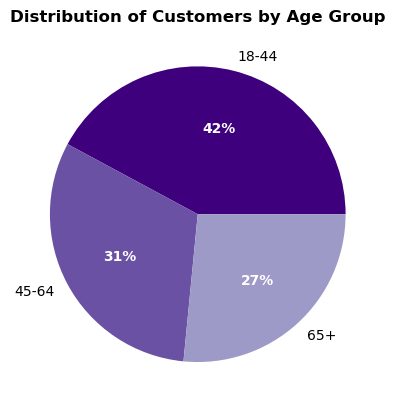

In [10]:
# plotting pie chart of number of customers

colors = plt.get_cmap('Purples_r', 5)

values = age_stats_index['user_idnunique']
labels = age_stats_index['age_group']

patches, labels, percentages = age_stats_pie = plt.pie(values, labels = labels, autopct = '%.0f%%', colors = colors(range(5)))

for text in percentages:
    text.set_color('white'),
    text.set_fontweight('bold')
    
plt.title('Distribution of Customers by Age Group', fontweight = 'bold')

# 2b. Sales Per Age Group

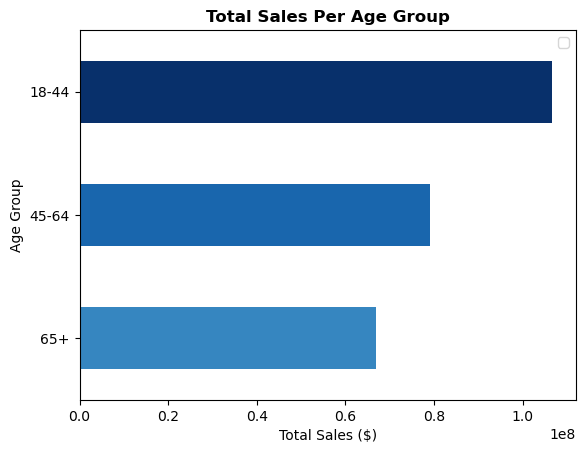

In [25]:
# plotting bar chart of prices

colors = plt.get_cmap('Blues')

age_price_bar = ax = age_stats_reindex.plot.barh(x = 'age_group', y = 'pricessum', color = colors((age_stats_reindex['pricessum'])/100000000))

ax.set_title('Total Sales Per Age Group', fontweight = 'bold')
ax.set_xlabel('Total Sales ($)')
ax.set_ylabel('Age Group')
ax.legend('')

# 2c. Orders Per Age Group

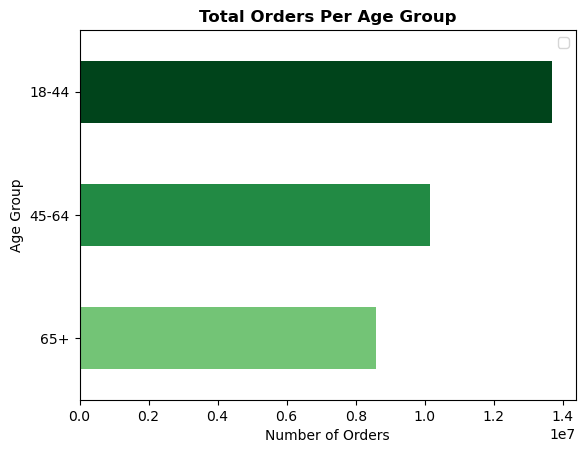

In [7]:
# plotting bar chart of orders

colors = plt.get_cmap('Greens')(np.linspace(0.5, 1, 3))

age_order_bar = ax = age_stats_reindex.plot.barh(x = 'age_group', y = 'user_idcount', color = colors)

ax.set_title('Total Orders Per Age Group', fontweight = 'bold')
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Age Group')
ax.legend('')

# 3. Sales Per Region

In [13]:
age_region = df.groupby(['region', 'age_group']).agg({'user_id' : 'nunique', 'prices' : 'sum'})

age_region

user_id      prices
region    age_group                     
Midwest   18-44        20407  25053813.4
          45-64        15292  18625266.0
          65+          12820  15513898.3
Northeast 18-44        15255  18580768.7
          45-64        11487  13838366.9
          65+           9646  12110970.2
South     18-44        29147  35947439.1
          45-64        21284  26044386.8
          65+          18306  22116084.5
West      18-44        22091  27031490.4
          45-64        16517  20458944.5
          65+          13957  17104691.8

In [14]:
# resetting index

age_region_index = age_region.reset_index()

age_region_index

,region,age_group,user_id,prices
0,Midwest,18-44,20407,25053813.4
1,Midwest,45-64,15292,18625266.0
2,Midwest,65+,12820,15513898.3
3,Northeast,18-44,15255,18580768.7
4,Northeast,45-64,11487,13838366.9
5,Northeast,65+,9646,12110970.2
6,South,18-44,29147,35947439.1
7,South,45-64,21284,26044386.8
8,South,65+,18306,22116084.5
9,West,18-44,22091,27031490.4


In [15]:
# pivot

age_region_pivot = age_region_index.pivot(index = 'region', columns = 'age_group', values = 'prices')

age_region_pivot

age_group,18-44,45-64,65+
region,,,
Midwest,25053813.4,18625266.0,15513898.3
Northeast,18580768.7,13838366.9,12110970.2
South,35947439.1,26044386.8,22116084.5
West,27031490.4,20458944.5,17104691.8


In [16]:
# sorting pivot by price

age_region_pivot = age_region_pivot.sort_values(by = '18-44', ascending = True)

age_region_pivot

age_group,18-44,45-64,65+
region,,,
Northeast,18580768.7,13838366.9,12110970.2
Midwest,25053813.4,18625266.0,15513898.3
West,27031490.4,20458944.5,17104691.8
South,35947439.1,26044386.8,22116084.5


In [17]:
# changing column order

age_region_pivot = age_region_pivot[['65+', '45-64', '18-44']]

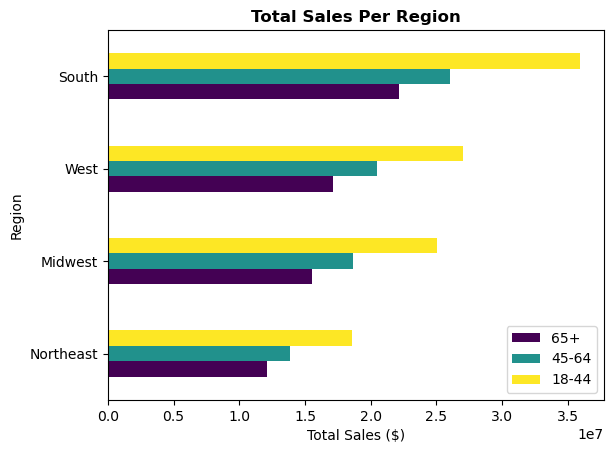

In [42]:
# creating bar chart of sum of purchaces

color = plt.get_cmap('viridis', 3)

age_region_bar = ax = age_region_pivot.plot.barh(color = color(range(3)))

ax.set_title('Total Sales Per Region', fontweight = 'bold')
ax.set_xlabel('Total Sales ($)')
ax.set_ylabel('Region')
ax.legend(title = '')

# 4. Sales Per Department

In [19]:
age_dep = df.groupby(['department', 'age_group']).agg({'prices' : 'sum'})

age_dep

prices
department age_group            
alcohol    18-44        533199.0
           45-64        400197.5
           65+          318257.8
babies     18-44       1381478.6
           45-64       1017727.8
...                          ...
produce    45-64      23598748.3
           65+        20065539.6
snacks     18-44       5222635.0
           45-64       3872242.5
           65+         3250660.5

[63 rows x 1 columns]

In [20]:
# resetting index

age_dep_index = age_dep.reset_index()

age_dep_index

,department,age_group,prices
0,alcohol,18-44,533199.0
1,alcohol,45-64,400197.5
2,alcohol,65+,318257.8
3,babies,18-44,1381478.6
4,babies,45-64,1017727.8
...,...,...,...
58,produce,45-64,23598748.3
59,produce,65+,20065539.6
60,snacks,18-44,5222635.0
61,snacks,45-64,3872242.5


In [21]:
# pivoting

age_dep_pivot = age_dep_index.pivot(index = 'department', columns = 'age_group', values = 'prices')

age_dep_pivot

age_group,18-44,45-64,65+
department,,,
alcohol,533199.0,400197.5,318257.8
babies,1381478.6,1017727.8,837954.2
bakery,3890374.7,2881436.2,2436215.1
beverages,8625886.4,6523426.8,5496821.9
breakfast,2392325.6,1782204.2,1470096.2
bulk,123116.3,88225.1,77307.2
canned goods,3410847.1,2511349.0,2130935.9
dairy eggs,19069213.5,13995681.1,11891230.7
deli,3455565.0,2561997.0,2159789.8


In [22]:
# sorting by prices

age_dep_pivot = age_dep_pivot.sort_values(by = '18-44', ascending = True)

age_dep_pivot

age_group,18-44,45-64,65+
department,,,
other,107563.5,80716.0,65428.5
bulk,123116.3,88225.1,77307.2
missing,254155.4,187493.5,157196.3
pets,330596.1,231951.3,208341.0
alcohol,533199.0,400197.5,318257.8
international,880042.4,642785.9,545644.4
babies,1381478.6,1017727.8,837954.2
personal care,1500944.0,1137775.0,940410.9
household,2296695.7,1705099.7,1452557.3


In [23]:
# re-ordering columns

age_dep_pivot = age_dep_pivot[['65+', '45-64', '18-44']]

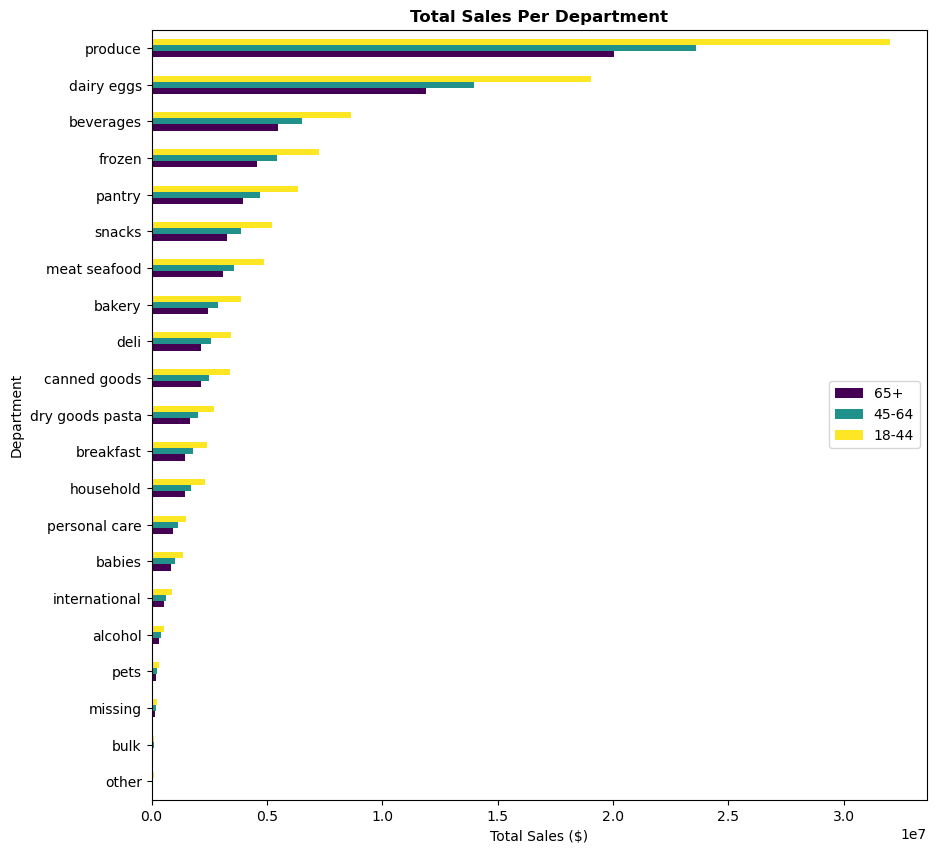

In [45]:
# creating bar chart

color = plt.get_cmap('viridis', 3)

age_dep_bar = ax = age_dep_pivot.plot.barh(color = color(range(3)), figsize = (10, 10))

ax.set_title('Total Sales Per Department', fontweight = 'bold')
ax.set_xlabel('Total Sales ($)')
ax.set_ylabel('Department')
ax.legend(title = '', loc = 'center right')